# Demo of Build tools for Chitin/Chitosan
- Build a short linear co-polymer chain (Chitin/Chitosan)
- Create a small SwiftPol Chitin ensemble, assign partial charges to the chain, and inspect the chains in the system

#### Import and inspect the monomers we will use in this build

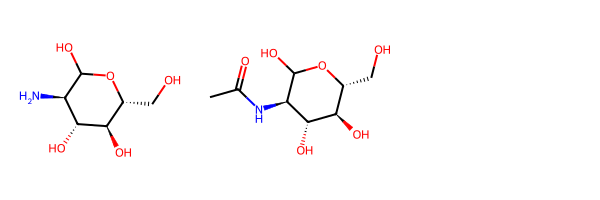

In [1]:
# Suppress OpenEye Toolkits license warnings, RDkit warnings
import warnings
warnings.filterwarnings("ignore")
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')   
# Import monomer to build Chitin (Glucosamine/N-acetyl-D-glucosamine) and visualise using RDkit
from rdkit import Chem
GlcN = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)N)O)O)O')
GlcNAc = Chem.MolFromSmiles('CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O)[C@@H]1O')
Chem.Draw.MolsToGridImage([GlcN,GlcNAc])

#### Add Iodine to mark 1,4 site where glycosidic bond is formed, to ensure SwiftPol builds the polymer correctly

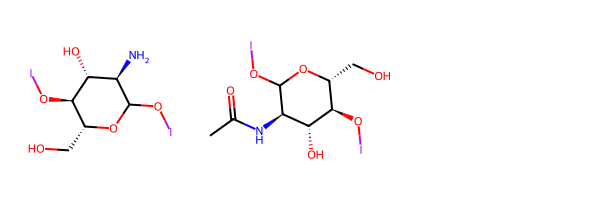

In [2]:
#Add Iodine to mark site 1,4 site where glycosidic bond is formed
GlcNI = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)OI)N)O)OI)O')
GlcNAcI = Chem.MolFromSmiles('CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O')
Chem.Draw.MolsToGridImage([GlcNI,GlcNAcI])

#### Build a short chain of chitosan and chitin

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html
LICENSE: No product keys!
The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html


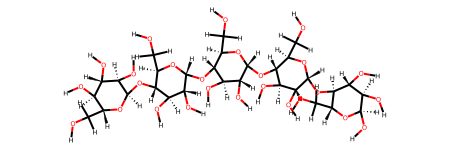

In [3]:
#Build Chitosan (GlcN) polymer using swiftpol
from swiftpol import build
from rdkit.Chem import AllChem
build.build_polymer(sequence='AAAAA', 
                        monomer_list=["C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)O)O)OI)O"],
                        reaction=AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]'),
                        terminal='hydroxyl')

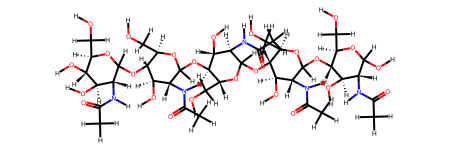

In [4]:
#Build Chitin (GlcNAc) polymer using swiftpol
from swiftpol import build
from rdkit.Chem import AllChem
build.build_polymer(sequence='AAAAA', 
                        monomer_list=['CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O'],
                        reaction=AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]'),
                        terminal='hydroxyl')


#### Build a chitosan ensemble using SwiftPol

System built!, size = 4
PDI=1.0011709313577375


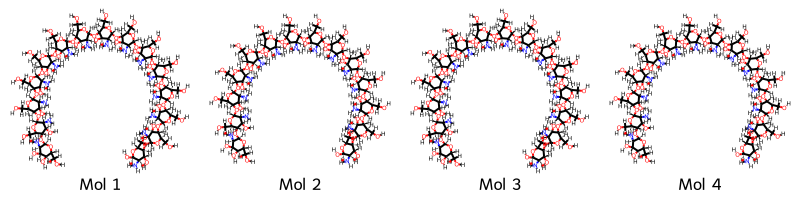

In [5]:
#Build Chitosan (GlcN) polymer ensemble using swiftpol
from rdkit.Chem import AllChem
sys = build.polymer_system(monomer_list = ['C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)N)O)OI)O'], 
               reaction = '[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]', 
               length_target = 15, 
               terminals = 'hydroxyl', 
               num_chains = 4, 
               perc_A_target=100, 
               blockiness_target=[1.0, 'B'], 
               copolymer=False,
               acceptance=5)
#Query the ensemble for the PDI value
print(f'PDI={sys.PDI}')
#Generate a grid image of the molecules
from rdkit.Chem import Draw
Draw.MolsToGridImage(
    sys.chain_rdkit,
    molsPerRow=4, 
    subImgSize=(200, 200),  
    legends=[f"Mol {i+1}" for i in range(len(sys.chain_rdkit))] 
)